In [8]:
import pandas as pd
df = pd.read_csv("cleaned_titanic_premium.csv")
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.014151,True,False,True
1,1,1,0.472229,1,0,0.139136,False,False,False
2,1,3,0.321438,0,0,0.015469,False,False,True
3,1,1,0.434531,1,0,0.103644,False,False,True
4,0,3,0.434531,0,0,0.015713,True,False,True


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print("Logistic Regression Trained")


Logistic Regression Trained


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Trained")


Random Forest Trained


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("\nConfusion Matrix:\n", cm)
    print("\nReport:\n", classification_report(y_test, y_pred))
    return acc, cm

log_acc, log_cm = evaluate_model(log_model, "Logistic Regression")
rf_acc, rf_cm = evaluate_model(rf_model, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

--- Random Forest ---
Accuracy: 0.8100558659217877

Confusion Matrix:
 [[96 14]
 [20 49]]

Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



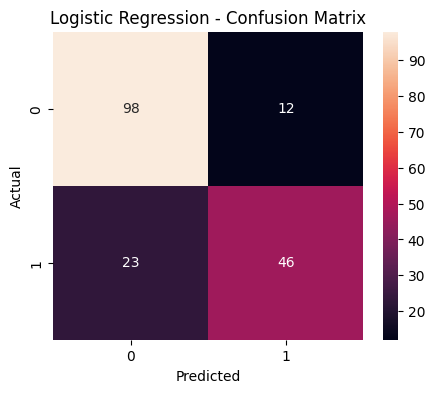

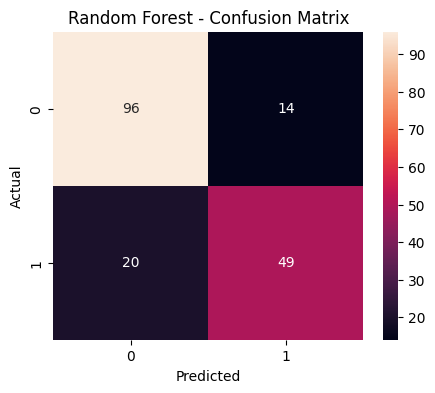

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(log_cm, annot=True, fmt="d")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(rf_cm, annot=True, fmt="d")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

# Probabilities for ROC curve
log_probs = log_model.predict_proba(X_test)[:,1]
rf_probs = rf_model.predict_proba(X_test)[:,1]

log_auc = roc_auc_score(y_test, log_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print("Logistic Regression ROC-AUC:", log_auc)
print("Random Forest ROC-AUC:", rf_auc)


Logistic Regression ROC-AUC: 0.8426877470355731
Random Forest ROC-AUC: 0.8348484848484848


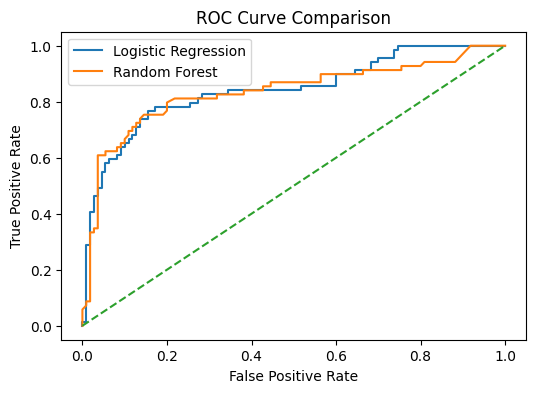

In [18]:
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(6,4))
plt.plot(log_fpr, log_tpr, label="Logistic Regression")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [19]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc],
    "ROC-AUC": [log_auc, rf_auc]
})

comparison


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.804469,0.842688
1,Random Forest,0.810056,0.834848
